<a href="https://colab.research.google.com/github/nurmuhimawann/Wayne-ExploreML/blob/ml-development/experiment_notebooks/Wayne_Red_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project Explore ML: Classification**

## **Summary & Goals**

Wayne memiliki fitur utama mengklasifikasikan kualitas red wine dengan memprediksi masukan dari pengguna dan mengklasifikasikannya ke dalam salah satu kelas. Hasil klasifikasi seharusnya menunjukkan kualitas red wine yang baik dan buruk (binary class).

## **Data Preparation**

Tahap ini merupakan langkah-langkah yang diperlukan untuk menyiapkan data.

### **Import Libraries**

Instal semua pustaka library yang diperlukan dalam project ini menggunakan fungsi import.

In [ ]:
# library
import pandas as pd # panda
import numpy as np # numpy
import seaborn as sns # seaborn
import matplotlib.pyplot as plt # matplotlib
%matplotlib inline

# algorithms
import sklearn # main module
from sklearn.svm import SVC # Support Vector Machine
from sklearn.naive_bayes import GaussianNB # Naïve Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest

from sklearn.preprocessing import LabelEncoder # label encoding
from sklearn.preprocessing import MinMaxScaler # scaling
from imblearn.over_sampling import SMOTE #oversampling
from sklearn.model_selection import train_test_split # splitting
from sklearn.metrics import accuracy_score #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import classification_report # report

# ignore all future warnings
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.filterwarnings('always')
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

### **Remote Connection to Kaggle**

Mengkonfigurasi dan mengatur koneksi dari Kaggle ke Google Colaboratory. Ini dilakukan untuk mengambil dataset yang tersedia di Kaggle untuk digunakan dalam pengembangan model di Colaboratory.

Menyiapkan token API kaggle menggunakan gdown command yang nantinya digunakan sebagai koneksi untuk mengunduh dataset yang diperlukan.

In [ ]:
# download json >> https://drive.google.com/file/d/1x5RMQ3yp049uZIxtIqNg3PwFqOqAAcu3/view?usp=share_link
! pip install gdown
! gdown 1x5RMQ3yp049uZIxtIqNg3PwFqOqAAcu3
! ls

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Downloading...
From: https://drive.google.com/uc?id=1x5RMQ3yp049uZIxtIqNg3PwFqOqAAcu3
To: /content/kaggle.json
100% 69.0/69.0 [00:00<00:00, 76.6kB/s]
kaggle.json  sample_data


In [ ]:
# API Credentials my kaggle
! mkdir ~/.kaggle
! cp '/content/kaggle.json' ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json
! ls ~/.kaggle

kaggle.json


In [ ]:
# source from kaggle -> https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009
! kaggle datasets download uciml/red-wine-quality-cortez-et-al-2009

  0% 0.00/25.6k [00:00<?, ?B/s]
100% 25.6k/25.6k [00:00<00:00, 15.3MB/s]


### **Data Extraction**

Melakukan ekstraksi file pada dataset karena dataset unduhan berekstensi zip.

In [ ]:
# unzip
! unzip red-wine-quality-cortez-et-al-2009.zip -d /content/

Archive:  red-wine-quality-cortez-et-al-2009.zip
  inflating: /content/winequality-red.csv  


## **Data Loading**

Proses memuat dataset menggunakan function **read_csv()** dan mengassign ke dalam variabel bernama df.

In [ ]:
# read csv
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


***
**Keterangan Feature:**
***


**fixed acidity** : Keasaman tetap

**volatile acidity** : Keasaman yang mudah menguap

**citric acid** : Asam Sitrat

**residual sugar** : Sisa gula

**chlorides** : Klorida

**free sulfur dioxide** : Belerang oksida bebas

**total sulfur dioxide** : Sulfur dioksida total

**density** : Densitas/kepadatan

**pH** : Derajat keasaman

**sulphates** : Sulfat

**alcohol** : Alkohol

**quality** : Kualitas Wine


## **Exploratory Data Analysis**

Exploratory Data Analysis merupakan proses investigasi awal yang bertujuan untuk mengidentifikasi pola, menemukan anomali, menguji hipotesis dan memeriksa asumsi. Dengan melakukan EDA, kita berharap dapat memahami isi dari dataset secara utuh.

Menggunakan function **info()** untuk mendapatkan info mengenai dataset mulai dari jumlah feature, shape, dtype. Disini bisa dilihat kalau dataset yang dipakai keseluruhan fiturnya merupakan data numerik yang bejumlah 1599 baris data, 11 feature dan 1 class bernama quality.

In [ ]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# descriptive statistics
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### **Univariate Analysis**

Dari grafik histogram berikut, beberapa insight yang dapat ditemukan antara lain: 
- Nilai variabel 'fixed_acidity', 'density', 'pH', 'sulphates' berdistribusi normal (agak skew). Bisa dilihat pada plot yang membentuk kurva menyerupai lonceng. 
- Ada dua puncak dalam distribusi pada variabel 'volatile_acidity' dan 'citric_acid'. 
- Variabel lain rata-rata memiliki distribusi yang tidak normal.

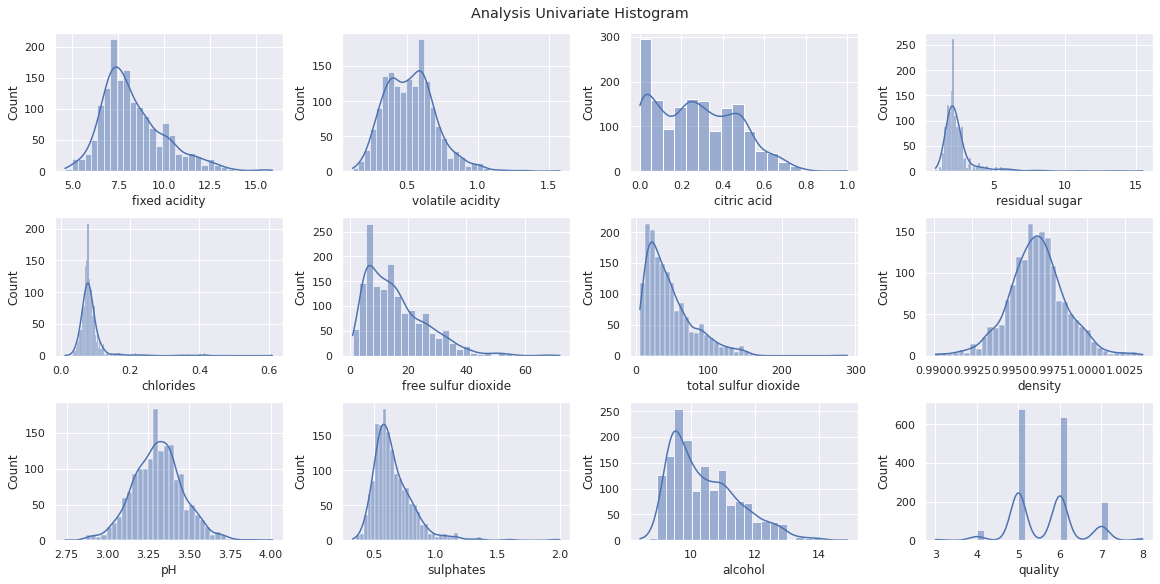

In [ ]:
# histplot
sns.set_theme(context='notebook', style='darkgrid', palette='deep')
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(16,8), constrained_layout=True)
plt.suptitle("Analysis Univariate Histogram")
ax=ax.flatten()
colhist = df.columns
for i, j in enumerate(colhist):
    sns.histplot(df[j], ax=ax[i], kde=True)

### **Bivariate Analysis**

In [ ]:
# barplot
def barplotVisualization(title_plot1, abscissa1, ordinate1, title_plot2, abscissa2, ordinate2):
  plt.figure(figsize=(20, 4))

  plt.subplot(1, 2, 1)
  plt.title(title_plot1)
  sns.barplot(data=df, x=abscissa1, y=ordinate1)

  plt.subplot(1, 2, 2)
  plt.title(title_plot2)
  sns.barplot(data=df, x=abscissa2, y=ordinate2)

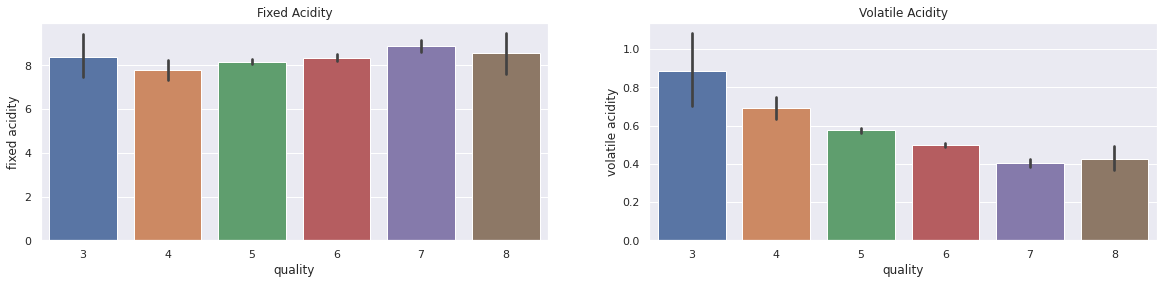

In [ ]:
# fixed acidity &	volatile acidity
barplotVisualization('Fixed Acidity', 'quality', 'fixed acidity', 
                     'Volatile Acidity', 'quality', 'volatile acidity')

Pada 'fixed acidity', kita tidak melihat pola terkait pengaruh variabel terhadap kualitas dari wine. sementara itu, pada 'volatile acidity' kita melihat grafik mengalami penurunan saat kualitas wine semakin meningkat.

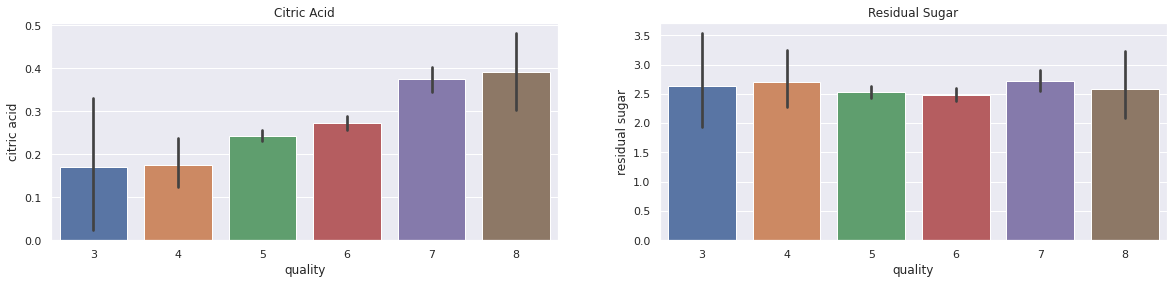

In [ ]:
# citric acid	& residual sugar
barplotVisualization('Citric Acid', 'quality', 'citric acid', 
                     'Residual Sugar', 'quality', 'residual sugar')

Pada 'citric acid', kita melihat grafik mengalami peningkatan seiring dengan peningkatan kualitas wine. sementara itu, pada 'residual sugar' tidak ada pengaruh yang signifikan pada variabel terhadap kualitas wine.

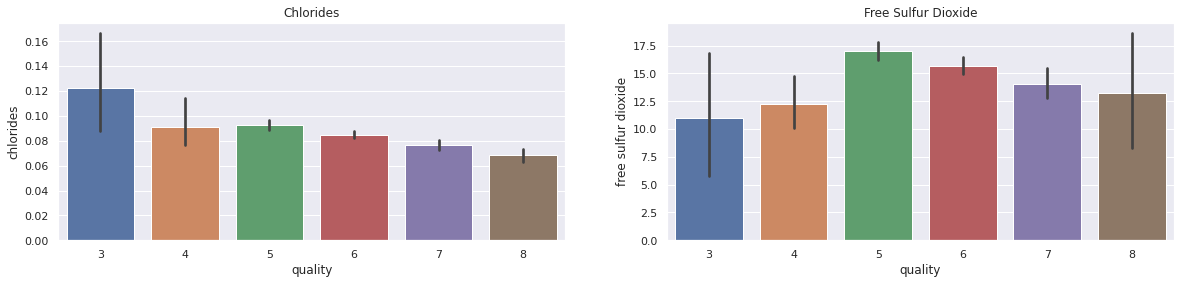

In [ ]:
# chlorides &	free sulfur dioxide
barplotVisualization('Chlorides', 'quality', 'chlorides', 
                     'Free Sulfur Dioxide', 'quality', 'free sulfur dioxide')

Pada 'chlorides' mengalami tren penurunan saat kualitas wine semakin baik, dan grafik pada 'free sulfur dioxide' nilai tertinggi pada kualitas wine yang normal

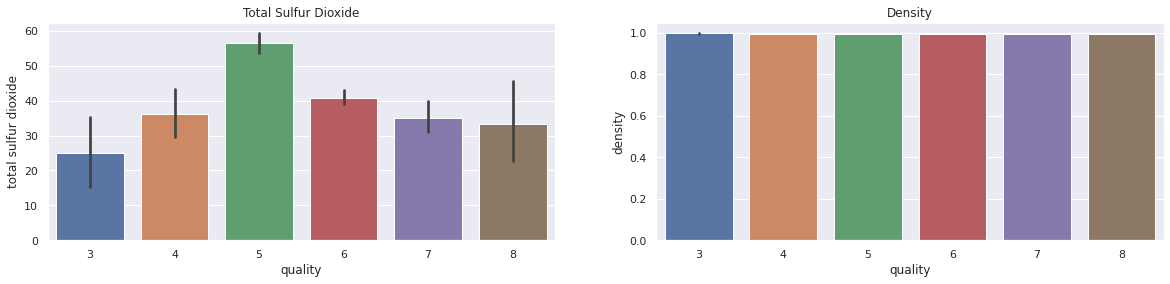

In [ ]:
# total sulfur dioxide & density
barplotVisualization('Total Sulfur Dioxide', 'quality', 'total sulfur dioxide', 
                     'Density', 'quality', 'density')

Grafik pada 'total sulfur dioxide' memiliki kemiripan dengan 'free sulfur dioxide' dan pada variabel 'density' tidak memiliki pengaruh yang signifikan terhadap kualitas wine.

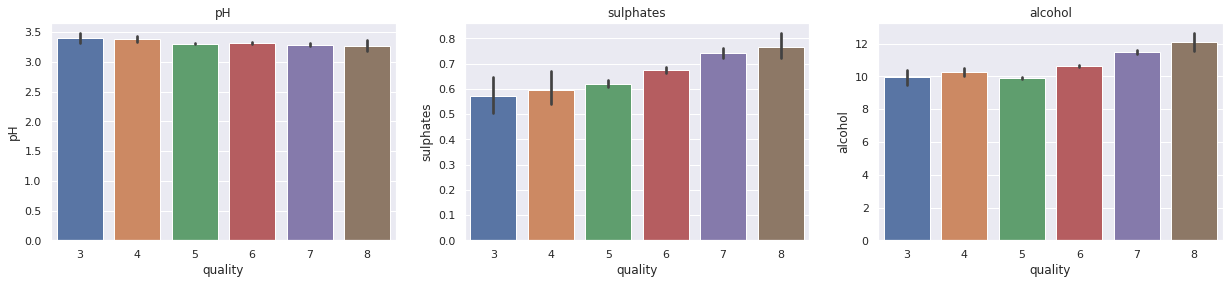

In [ ]:
# pH & sulphates & alcohol
plt.figure(figsize=(21, 4))
plt.subplot(1, 3, 1)
plt.title('pH')
sns.barplot(data=df, x='quality', y='pH')

plt.subplot(1, 3, 2)
plt.title('sulphates')
sns.barplot(data=df, x='quality', y='sulphates')

plt.subplot(1, 3, 3)
plt.title('alcohol')
sns.barplot(data=df, x='quality', y='alcohol')

Variabel 'sulphates' dan 'alcohol' memiliki bentuk grafik yang mirip, dimana mengalami peningkatan seiring dengan kualitas wine yang semakin baik. dan variabel 'pH' tidak terlalu signifikan.

### **Multivariate Analysis**

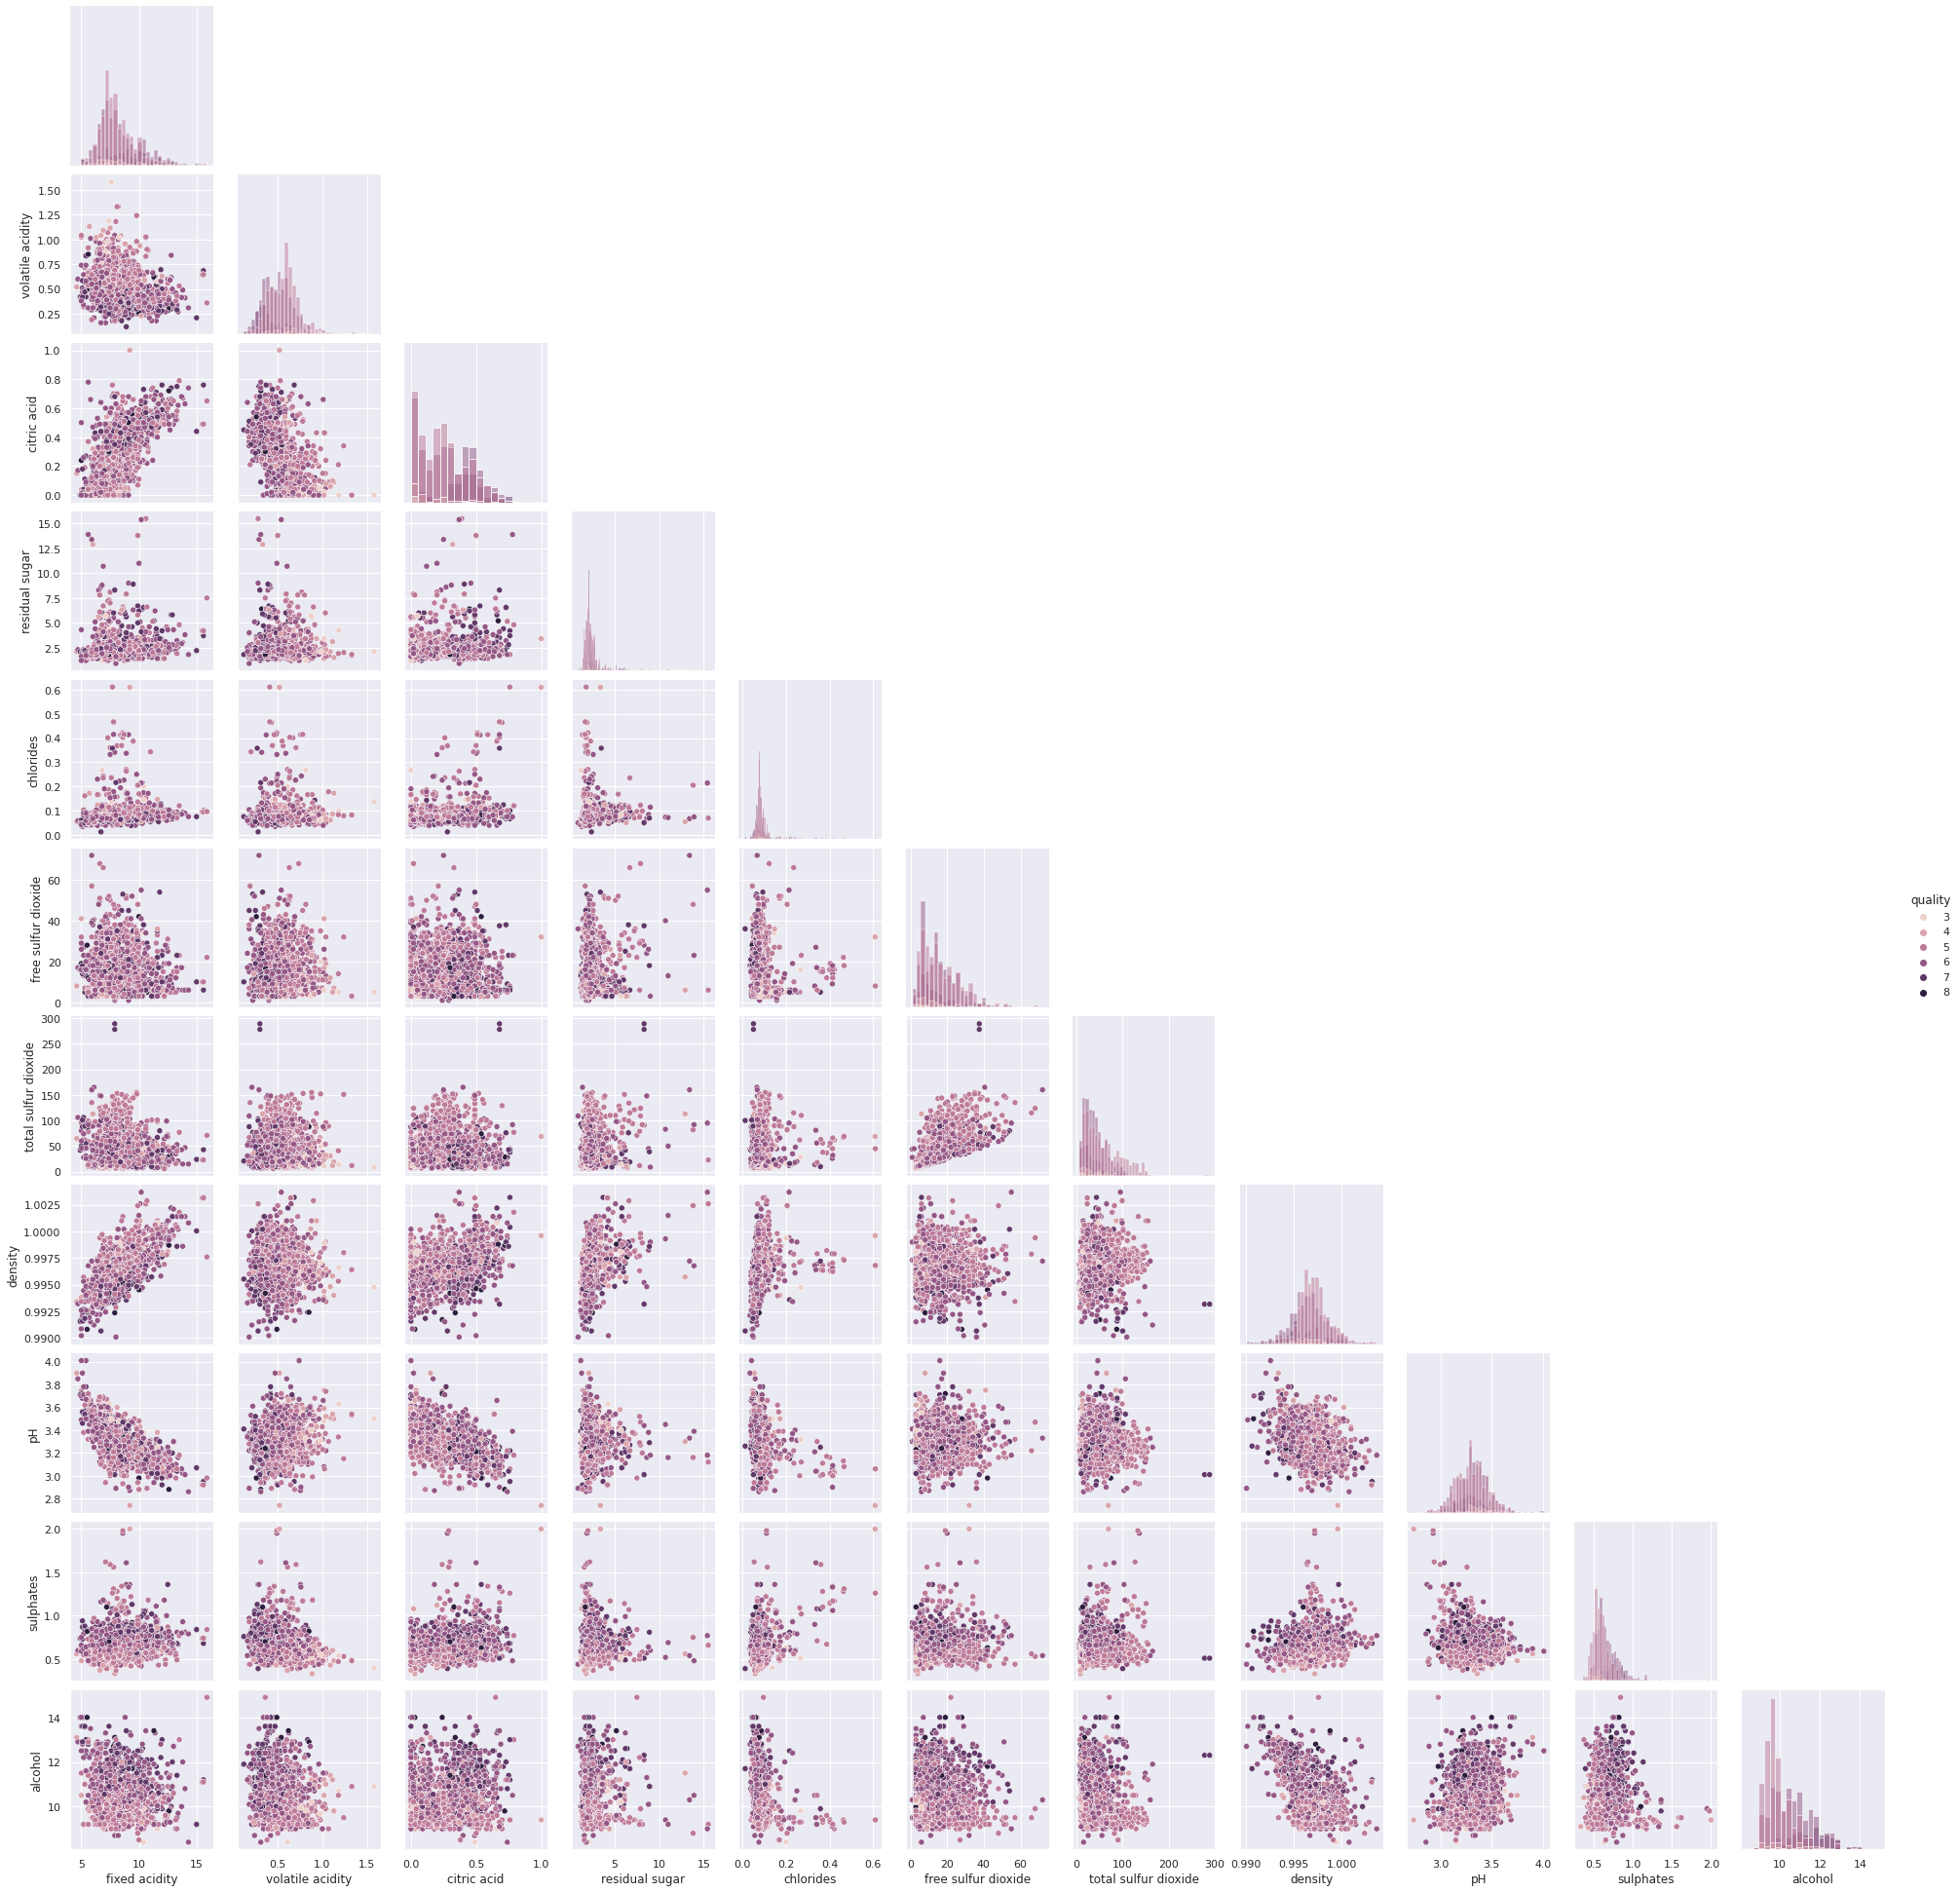

In [ ]:
# pairplot
sns.pairplot(df, diag_kind="hist", hue="quality", corner=True);

Dari data di atas dapat dilihat korelasi antar fitur pada dataset, namun jika kita perhatikan sekilas, adanya multikolinearitas pada feature 'free sulfur dioxide' dan 'total sulfur dioxide' yang merupakan suatu kondisi dimana salah satu atau beberapa fitur dalam suatu data memiliki korelasi yang tinggi antar satu sama lain. Dalam konteks pemodelan statistik, multikolinearitas dapat mempengaruhi hasil dari model dan membuat interpretasi dari hasil model menjadi sulit atau tidak bermakna. Hal ini perlu dipertimbangkan ketika memakai kedua feature ini secara bersamaan dalam pemodelan nantinya.

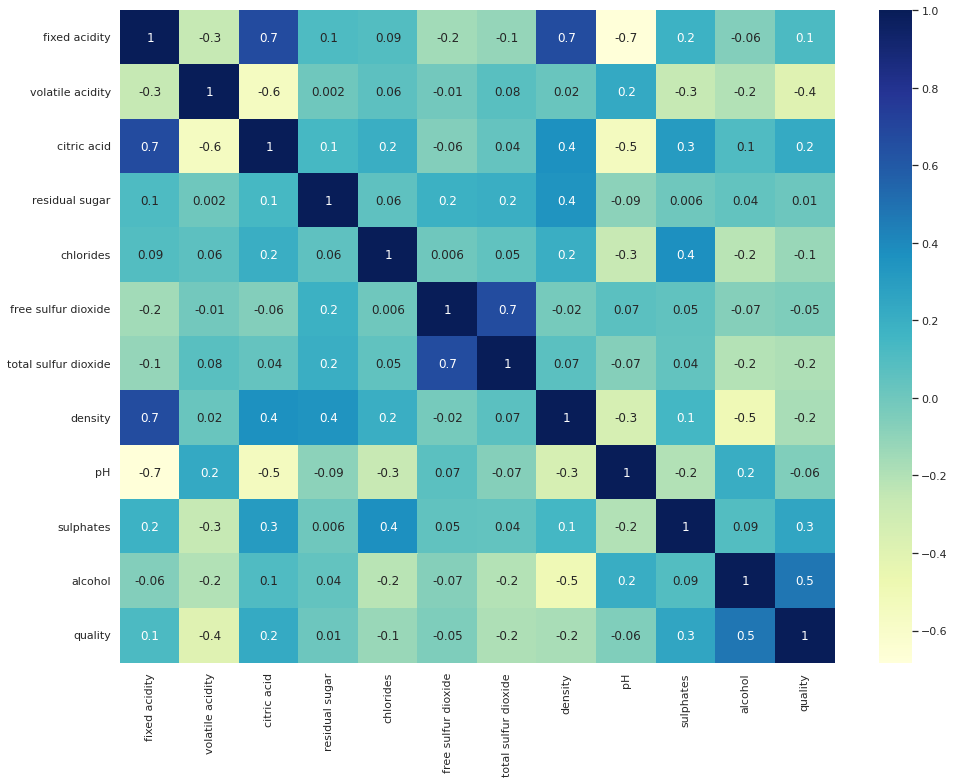

In [ ]:
# heatmap
plt.figure(figsize = (16,12))
sns.heatmap(df.corr(), annot = True, fmt = '.1g', cmap = 'YlGnBu')
plt.show()

In [ ]:
# drop columns multicolinearity
df = df.drop(['free sulfur dioxide'], axis = 1)

# drop columns yang tidak memiliki pengaruh yang signifikan terhadap quality
df = df.drop(['fixed acidity', 'residual sugar', 'density', 'pH'], axis = 1)

# draw heatmap again
plt.figure(figsize = (16,12))
sns.heatmap(df.corr(), annot = True, fmt = '.1g', cmap = 'YlGnBu')
plt.show()

,volatile acidity,citric acid,chlorides,total sulfur dioxide,sulphates,alcohol,quality
0,0.700,0.00,0.076,34.0,0.56,9.4,5
1,0.880,0.00,0.098,67.0,0.68,9.8,5
2,0.760,0.04,0.092,54.0,0.65,9.8,5
3,0.280,0.56,0.075,60.0,0.58,9.8,6
4,0.700,0.00,0.076,34.0,0.56,9.4,5
...,...,...,...,...,...,...,...
1594,0.600,0.08,0.090,44.0,0.58,10.5,5
1595,0.550,0.10,0.062,51.0,0.76,11.2,6
1596,0.510,0.13,0.076,40.0,0.75,11.0,6
1597,0.645,0.12,0.075,44.0,0.71,10.2,5


## **Data Preprocessing**

### **Missing Values**

Mengecek missing values pada dataset

In [ ]:
# check missing values
(df.isnull() | df.empty | df.isna()).sum()

volatile acidity        0
citric acid             0
chlorides               0
total sulfur dioxide    0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### **Data Duplicate**

Mengecek data yang duplikat pada dataset. ditemukan ada 240 data duplikat pada dataset.

In [ ]:
# check duplicates data
df.duplicated().sum()

243

Menghapus data yang duplikat

In [ ]:
# remove duplicates data
df.drop_duplicates(inplace=True)
if df.duplicated().sum() == 0:
  print('no duplicate instances')
  print(f'shape: {df.shape}')
else:
  print(f'duplicated instace: {df.duplicated().sum()} data')

no duplicate instances
shape: (1356, 7)


### **Label Encoding**

Proses label encoding dilakukan untuk mengelompokkan data menjadi 2 class (binary class), dari proses eksplorasi sebelumnya diketahui bahwa sebaran data pada class 'quality' memiliki 6 class. Pada Encoding kali ini, data akan dikelompokkan menjadi 2 class yaitu 'Good Wine' yang direpresentasikan dengan nilai 1 or 'Bad Wine' yang direpresentasikan dengan nilai 0.

In [ ]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
# label encoding
def encode(data):
  df.replace(to_replace={'quality': {3:0, 4:0, 5:0, 6:0, 
                                     7:1, 8:1}}, inplace=True)
  return df

In [ ]:
encode(df)

,volatile acidity,citric acid,chlorides,total sulfur dioxide,sulphates,alcohol,quality
0,0.700,0.00,0.076,34.0,0.56,9.4,0
1,0.880,0.00,0.098,67.0,0.68,9.8,0
2,0.760,0.04,0.092,54.0,0.65,9.8,0
3,0.280,0.56,0.075,60.0,0.58,9.8,0
5,0.660,0.00,0.075,40.0,0.56,9.4,0
...,...,...,...,...,...,...,...
1593,0.620,0.08,0.068,38.0,0.82,9.5,0
1594,0.600,0.08,0.090,44.0,0.58,10.5,0
1595,0.550,0.10,0.062,51.0,0.76,11.2,0
1597,0.645,0.12,0.075,44.0,0.71,10.2,0


Dari sini kita mendapatkan 1172 data untuk 'Bad Wine' dan 184 data untuk 'Good Wine' 

In [ ]:
# low quality becomes 0 and high quality becomes 1
df['quality'].value_counts()

0    1172
1     184
Name: quality, dtype: int64

### **Train-Test Split**

Proses split dilakukan untuk membagi dataset menjadi 2 bagian yaitu data untuk latihan (train) dan data untuk pengujian (testing). Dataset dibagi dengan rasio 7:3 dengan proporsi pada data train yang lebih banyak. 

In [ ]:
# assign values
X = df.drop(['quality'], axis = 1).values # feature
Y = df['quality'].values # label

In [ ]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### **Feature Scaling**

feature scaling untuk menyeragamkan skala data agar memiliki rentang yang sama. MinMax dipakai karena dataset memiliki kecenderungan pada distribusi yang tidak normal.

In [ ]:
# MinMax
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

### **Imbalanced Classes**

Sebelumnya dari label encoding, kita melihat bahwa class pada dataset tidak seimbang (imbalanced). Hal ini perlu dilakukan penanganan khusus agar hasil klasifikasi tidak condong ke arah majority class. Teknik yang dipakai dalam handling kali ini adalah Synthetic Minority Oversampling Technique (SMOTE).

0    817
1    132
dtype: int64



Text(0.5, 1.0, 'Train Class')

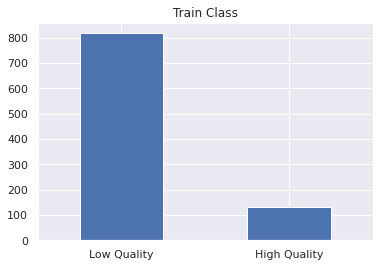

In [ ]:
# imbalanced class
df_y_train = pd.DataFrame(y_train)
print(f'{df_y_train.value_counts()}\n')

df_y_train.value_counts().plot(kind='bar')
plt.xticks([0, 1],['Low Quality','High Quality'], rotation=0)
plt.xlabel('')
plt.title('Train Class')

In [ ]:
# # smote oversampling
smote = SMOTE(sampling_strategy = 'minority')
x_smote, y_smote = smote.fit_resample(x_train, y_train)

0    817
1    817
dtype: int64



Text(0.5, 1.0, 'Train Class')

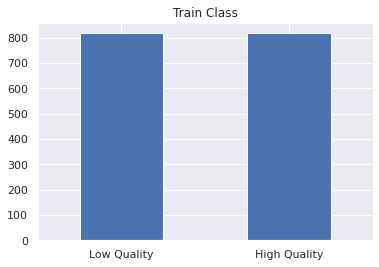

In [ ]:
# imbalanced class
df_y_smote = pd.DataFrame(y_smote)
print(f'{df_y_smote.value_counts()}\n')

df_y_smote.value_counts().plot(kind='bar')
plt.xticks([0, 1],['Low Quality','High Quality'], rotation=0)
plt.xlabel('')
plt.title('Train Class')

Data telah siap untuk digunakan dalam proses selanjutnya.

## **Modeling**

Proses pemodelan merupakan langkah utama dalam proyek ini, karena pemodelan adalah bagian dimana kita membuat model baru berdasarkan permasalahan. Dalam proses modeling kali ini, dipakai 4 algoritma klasifikasi diantaranya SVM, Naive Bayes, Decision Tree dan Random Forest.

In [ ]:
# object model
svm = SVC(kernel='rbf')
nbc = GaussianNB()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=128)

# train
svm.fit(x_smote, y_smote)
nbc.fit(x_smote, y_smote)
dt.fit(x_smote, y_smote)
rf.fit(x_smote, y_smote)

# predict
y_predSVM = svm.predict(x_test)
y_predNBC = nbc.predict(x_test)
y_predDT = dt.predict(x_test)
y_predRF = rf.predict(x_test)

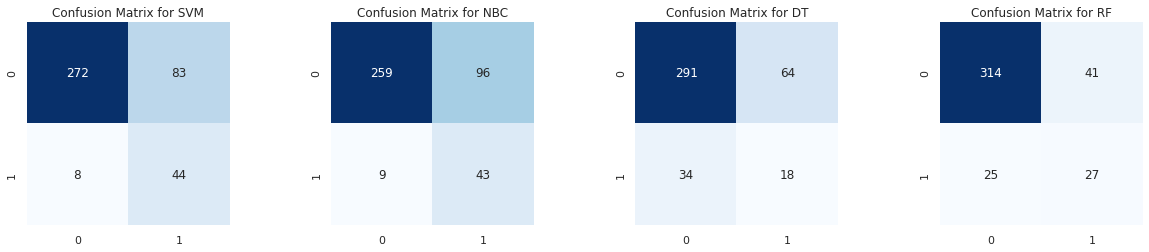

In [ ]:
# conf-matrix
fig, ax = plt.subplots(nrows=1,ncols=4, figsize=(20,8))

conf_mat = confusion_matrix(y_test, y_predSVM)
sns.heatmap(conf_mat, ax=ax[0], square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
ax[0].set_title('Confusion Matrix for SVM')

conf_mat = confusion_matrix(y_test, y_predNBC)
sns.heatmap(conf_mat, ax=ax[1], square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
ax[1].set_title('Confusion Matrix for NBC')

conf_mat = confusion_matrix(y_test, y_predDT)
sns.heatmap(conf_mat, ax=ax[2], square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
ax[2].set_title('Confusion Matrix for DT')

conf_mat = confusion_matrix(y_test, y_predRF)
sns.heatmap(conf_mat, ax=ax[3], square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
ax[3].set_title('Confusion Matrix for RF')

plt.subplots_adjust(wspace=0.5)
plt.show()

Dari accuracy dibawah, didapatkan bahwa Decision Tree & Random Forest memiliki tingkat accuracy yang tinggi pada proses training. Namun pada testing memiliki accuracy yang lebih rendah daripada proses training. Hal ini, bisa dikatakan bahwa model overfit.

In [ ]:
# acc_score
acc_score = pd.DataFrame(columns=['train', 'test'], index=['SVM','NBC','DT','RF'])
model_dict = {'SVM': svm, 'NBC': nbc, 'DT': dt, 'RF' : rf}
for name, model in model_dict.items():
    acc_score.loc[name, 'train'] = model.score(x_smote, y_smote)
    acc_score.loc[name, 'test'] = model.score(x_test, y_test)

acc_score

,train,test
SVM,0.847613,0.776413
NBC,0.789474,0.742015
DT,1.0,0.759214
RF,1.0,0.837838


In [ ]:
# classification report
print(f'Support Vector Machine\n\n {classification_report(y_test, y_predSVM)}\n')
print(f'Naïve Bayes\n\n {classification_report(y_test, y_predNBC)}\n')
print(f'Decision Tree\n\n {classification_report(y_test, y_predDT)}\n')
print(f'Random Forest\n\n {classification_report(y_test, y_predRF)}')

Support Vector Machine

               precision    recall  f1-score   support

           0       0.97      0.77      0.86       355
           1       0.35      0.85      0.49        52

    accuracy                           0.78       407
   macro avg       0.66      0.81      0.67       407
weighted avg       0.89      0.78      0.81       407


Naïve Bayes

               precision    recall  f1-score   support

           0       0.97      0.73      0.83       355
           1       0.31      0.83      0.45        52

    accuracy                           0.74       407
   macro avg       0.64      0.78      0.64       407
weighted avg       0.88      0.74      0.78       407


Decision Tree

               precision    recall  f1-score   support

           0       0.90      0.82      0.86       355
           1       0.22      0.35      0.27        52

    accuracy                           0.76       407
   macro avg       0.56      0.58      0.56       407
weighted avg     

Dari classification report, didapatkan Random Forest memiliki tingkat accuracy yang cukup baik dibandingkan dengan 4 algoritma lainnya yaitu sebesar 84% dan nilai F1-Score sebesar 0.9 pada 'Bad Wine' dan 0.45 pada 'Good Wine'

In [ ]:
# report in dataframe
report_RF = classification_report(y_test, y_predRF, output_dict=True)
df_report = pd.DataFrame(report_RF).transpose()
df_report

,precision,recall,f1-score,support
0,0.926254,0.884507,0.904899,355.000000
1,0.397059,0.519231,0.450000,52.000000
accuracy,0.837838,0.837838,0.837838,0.837838
macro avg,0.661656,0.701869,0.677450,407.000000
weighted avg,0.858642,0.837838,0.846779,407.000000
